In [1]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('stylesheet.mplstyle')

# Set color variables to make colors easier later
lightblue = '#54d2d2'
yellow = '#ffcb00'
orange = '#f8aa4b'
pink = '#ff6150'
gray = '#a89cac'
wrblue = '#0197F6'

# define some dictionaries to make it easy to loop over metallicities
cc = {'Z014': pink,
      'Z006': orange,
      'Z002': yellow,
      'Z0002': lightblue}

ldict = {'Z014': 'Z = 0.014',
         'Z006': 'Z = 0.006',
         'Z002': 'Z = 0.002',
         'Z0002': 'Z = 0.0002'}

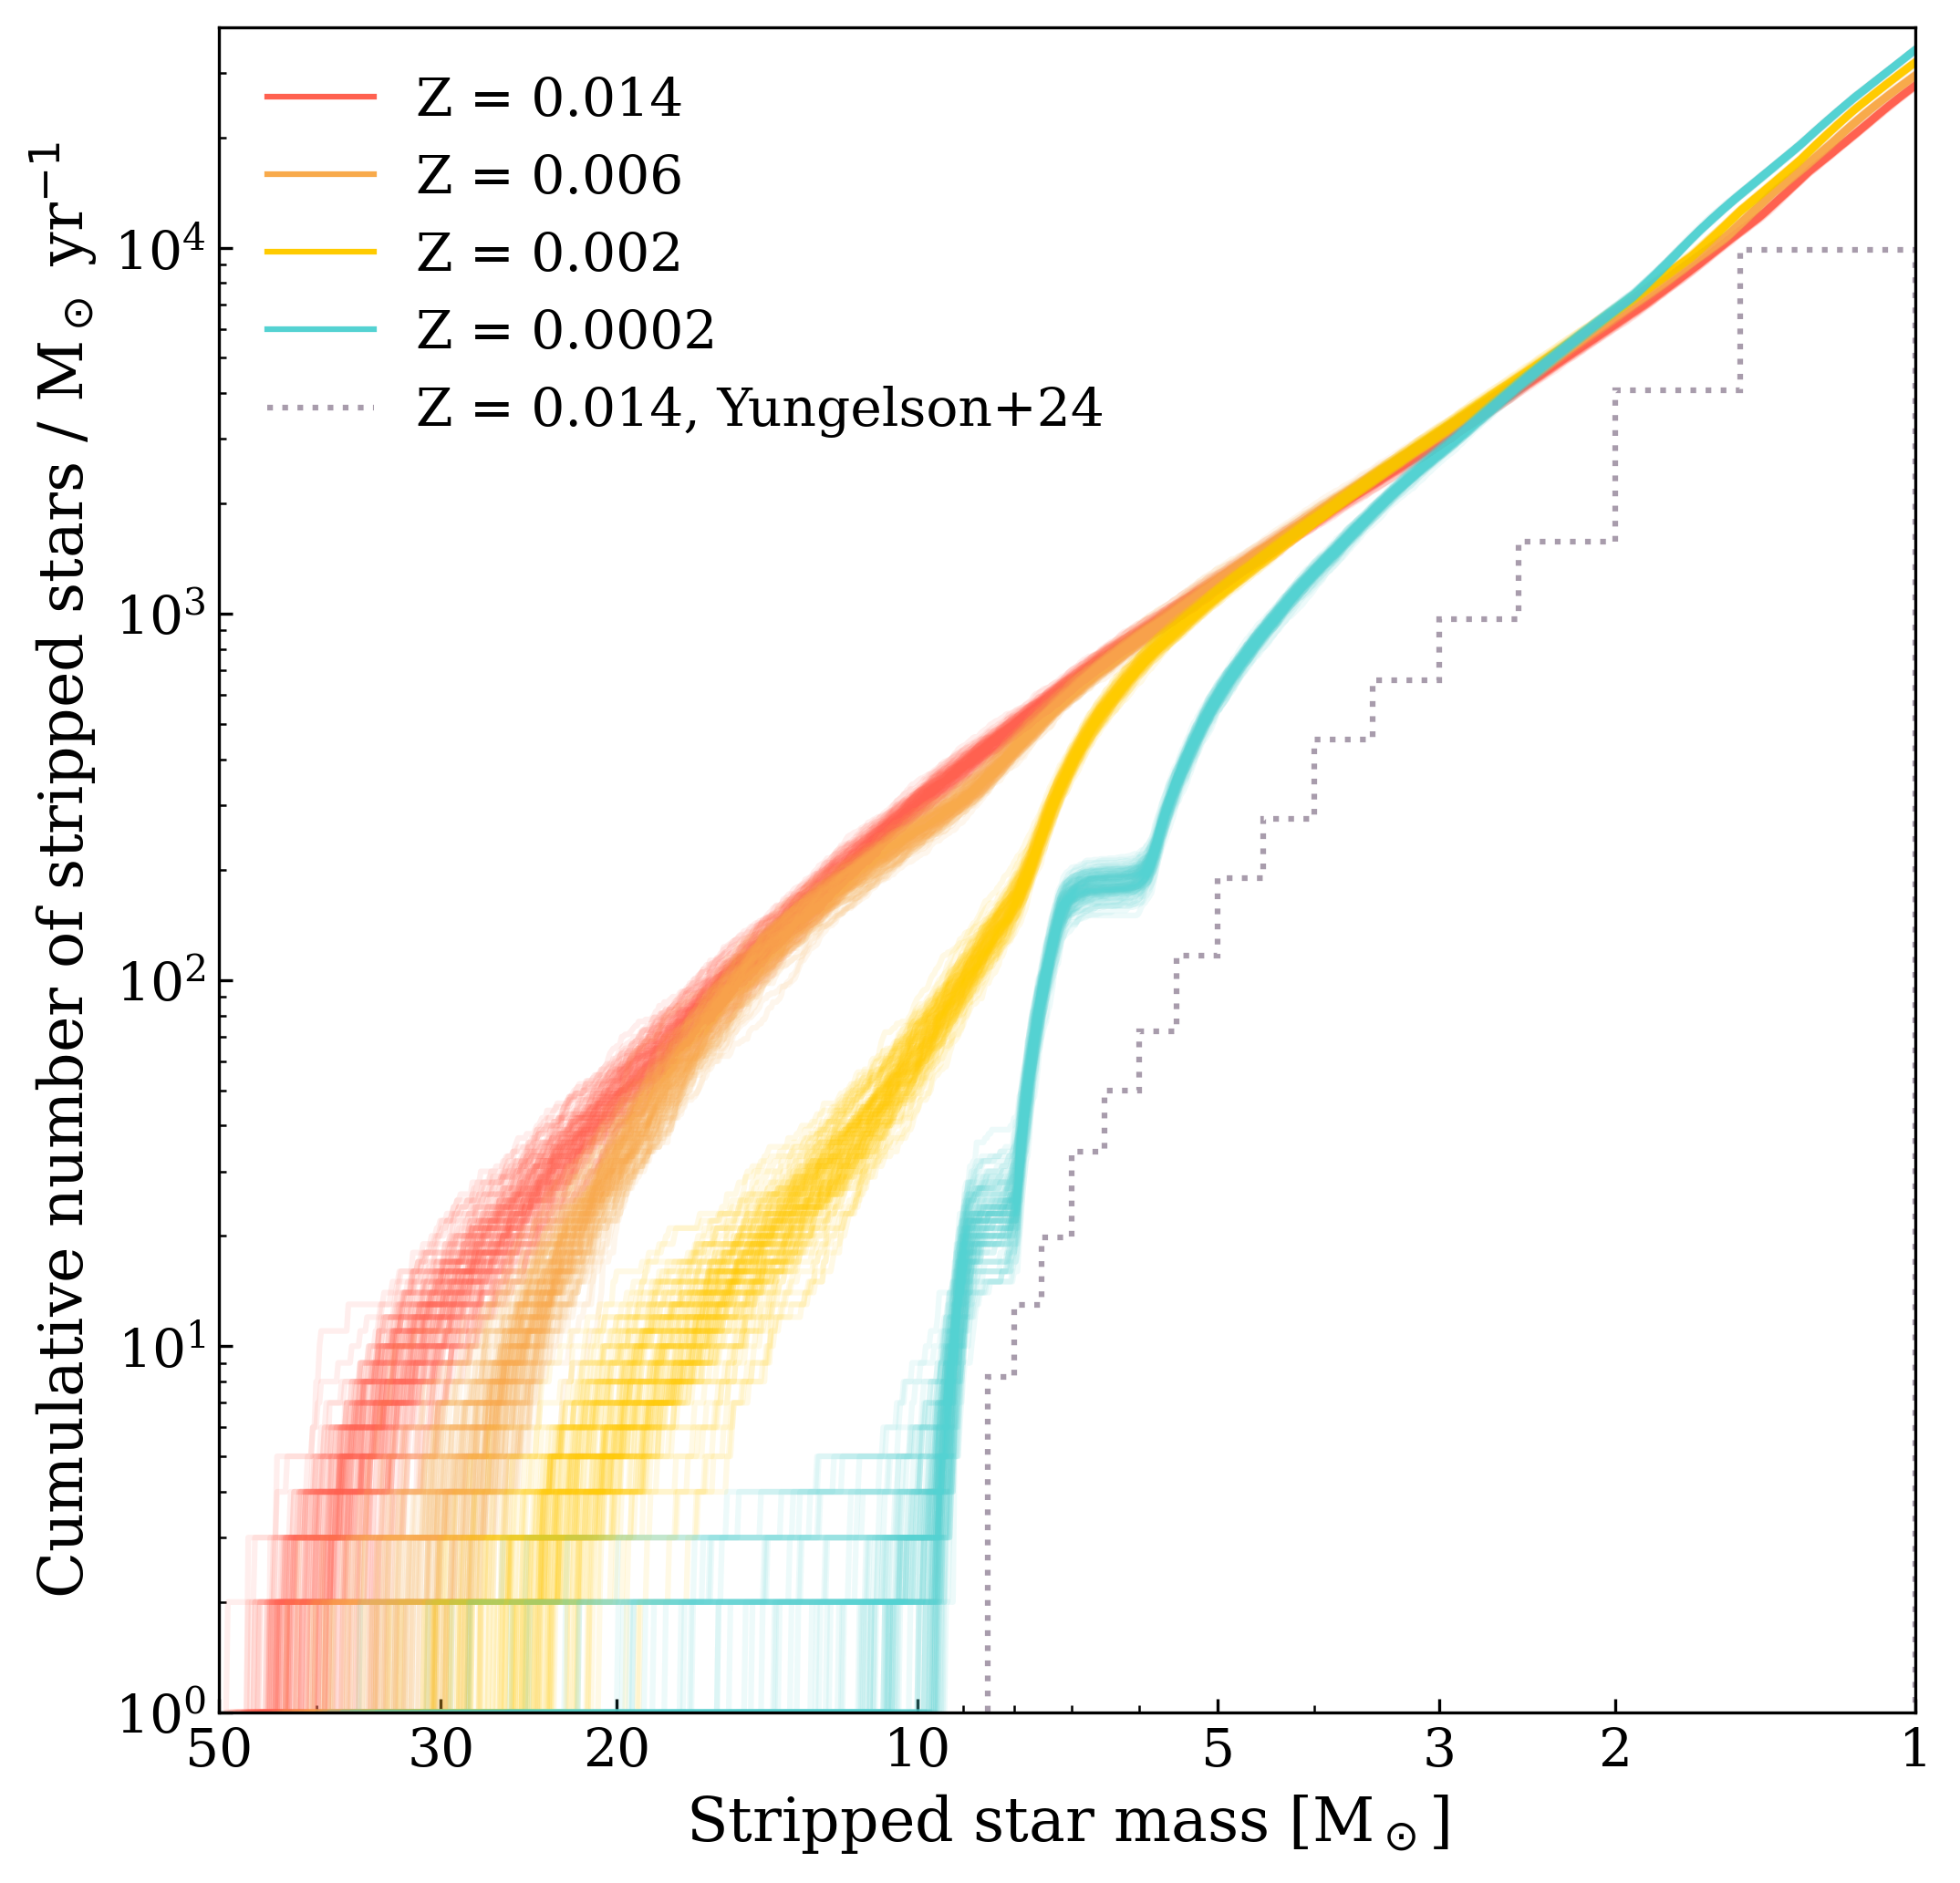

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))

# bins
nbins = 21
bins = np.geomspace(1, 50, 1000)

# loop over all 4 metallicities
for l, env in enumerate(cc.keys()):
    # open population synthesis results
    datafile = f'../data/histograms/hist_{env}.txt'
    hists = np.genfromtxt(datafile)
    # make a cdf that's calculated from 50 Msun to 1 Msun
    cdf100 = np.flip(np.cumsum(np.flip(hists, axis=1), axis=1), axis=1)
    # plot cdf for all 100 runs at each metallicity
    for i, run in enumerate(cdf100):
        if i==0:
            ax.plot(bins, run, color=cc[env], alpha=0.1, label=ldict[env])
        else:
            ax.plot(bins, run, color=cc[env], alpha=0.1)

# plot Yungelson+24 data
ydata = np.genfromtxt('../data/histograms/yungelson_hist.txt', skip_header=1, delimiter=',')
ax.stairs(ydata[:,2] / 2, [*ydata[:,0], 8.5], color=gray, lw=1.5, label='Z = 0.014, Yungelson+24', zorder=0, ls=':')

# axis formatting
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylim(1, 4e4)
ax.set_xlim(50, 1)
ax.set_xticks(np.flip([1, 2, 3, 5, 10, 20, 30, 50]))
ax.set_xticklabels(['50', '30', '20', '10', '5', '3', '2', '1'])
ax.set_xlabel(r'Stripped star mass [M$_\odot$]')
ax.set_ylabel(r'Cumulative number of stripped stars / M$_\odot$ yr$^{-1}$')
# ax.grid(which='major', ls=':')
# ax.grid(which='minor', ls=':', alpha=0.3)

leg = ax.legend()
for lh in leg.legend_handles: 
    lh.set_alpha(1)

plt.savefig('cumulative.png', bbox_inches='tight')